Code for getting data in standard format from Mel's pickle, and plotting to check

In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.integrate import odeint
from astropy import cosmology
from IPython.display import Image
import pickle

In [7]:
%matplotlib inline
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 12

In [8]:
C = cosmology.FlatLambdaCDM(70.0, 0.3)

In [9]:
basic_states = ['BD', 'RD', 'RE']
states = []
for i in range(6):
    for s in basic_states:
        states.append('{}{}'.format(s, i))
states.append('NE')
states = pd.Index(states)
nStates = len(states)

In [10]:
states

Index(['BD0', 'RD0', 'RE0', 'BD1', 'RD1', 'RE1', 'BD2', 'RD2', 'RE2', 'BD3',
       'RD3', 'RE3', 'BD4', 'RD4', 'RE4', 'BD5', 'RD5', 'RE5', 'NE'],
      dtype='object')

In [11]:
rate_labels = [['$r_{' + '{} \\rightarrow {}'.format(s2, s1) + '}$' for s2 in states] for s1 in states]
rate_labels = pd.DataFrame(index='to ' + states, columns='from ' + states, data=rate_labels)
rate_evol_labels = rate_labels.replace('\$r', '$\dot{r}', regex=True)
N_labels = '$N_{' + states + '}$'

In [16]:
with open('results.pickle', 'rb') as handle:
    results = pickle.load(handle, encoding='latin1')

In [17]:
mdata = results['m_centers'][1:]
zdata = results['z_centers']
tdata = C.age(zdata)
z0 = 1.0
t0 = C.age(z0).value

In [18]:
Ndata = pd.DataFrame(index=zdata, columns=N_labels, data=np.zeros((len(zdata), nStates)))
for i in range(1, 5):
    mresults = results['M={:.2f}'.format(mdata[i-1])]
    for key, value in mresults.items():
        if key.startswith('N'):
            state = '{}{}'.format(key[2:], i)
            Ndata['$N_{' + state + '}$'] = value
Ndata = Ndata[::-1]
Nerr = np.sqrt(Ndata)

In [19]:
Ndata

,$N_{BD0}$,$N_{RD0}$,$N_{RE0}$,$N_{BD1}$,$N_{RD1}$,$N_{RE1}$,$N_{BD2}$,$N_{RD2}$,$N_{RE2}$,$N_{BD3}$,$N_{RD3}$,$N_{RE3}$,$N_{BD4}$,$N_{RD4}$,$N_{RE4}$,$N_{BD5}$,$N_{RD5}$,$N_{RE5}$,$N_{NE}$
0.99,0.0,0.0,0.0,1164.077179,8.774451,225.225549,985.663340,70.195609,514.804391,643.459747,128.691949,587.308051,266.158350,114.067864,310.932136,0.0,0.0,0.0,0.0
0.76,0.0,0.0,0.0,1071.881221,33.094103,579.905897,919.280636,101.120870,836.879130,643.496445,141.569218,750.430782,253.721455,99.282309,365.717691,0.0,0.0,0.0,0.0
0.54,0.0,0.0,0.0,533.579750,24.131747,285.868253,474.591034,48.263495,303.736505,336.503812,44.241537,200.758463,119.318085,34.856969,124.143031,0.0,0.0,0.0,0.0
0.31,0.0,0.0,0.0,382.000000,57.000000,243.000000,337.000000,67.000000,237.000000,214.000000,42.000000,167.000000,69.000000,20.000000,106.000000,0.0,0.0,0.0,0.0


In [20]:
Nerr

,$N_{BD0}$,$N_{RD0}$,$N_{RE0}$,$N_{BD1}$,$N_{RD1}$,$N_{RE1}$,$N_{BD2}$,$N_{RD2}$,$N_{RE2}$,$N_{BD3}$,$N_{RD3}$,$N_{RE3}$,$N_{BD4}$,$N_{RD4}$,$N_{RE4}$,$N_{BD5}$,$N_{RD5}$,$N_{RE5}$,$N_{NE}$
0.99,0.0,0.0,0.0,34.118575,2.962170,15.007516,31.395276,8.378282,22.689301,25.366508,11.344247,24.234439,16.314360,10.680256,17.633268,0.0,0.0,0.0,0.0
0.76,0.0,0.0,0.0,32.739597,5.752747,24.081235,30.319641,10.055887,28.928863,25.367232,11.898286,27.393992,15.928636,9.964051,19.123747,0.0,0.0,0.0,0.0
0.54,0.0,0.0,0.0,23.099345,4.912408,16.907639,21.785110,6.947193,17.428038,18.344040,6.651431,14.168926,10.923282,5.903979,11.141949,0.0,0.0,0.0,0.0
0.31,0.0,0.0,0.0,19.544820,7.549834,15.588457,18.357560,8.185353,15.394804,14.628739,6.480741,12.922848,8.306624,4.472136,10.295630,0.0,0.0,0.0,0.0


In [21]:
nGal = Ndata.sum(1)
nGal

0.99    5019.358616
0.76    5796.379757
0.54    2529.992681
0.31    1941.000000
dtype: float64

In [114]:
Ndata = (Ndata.T / nGal).T
Nerr = (Nerr.T / nGal).T

In [115]:
Ndata

,$N_{BD0}$,$N_{RD0}$,$N_{RE0}$,$N_{BD1}$,$N_{RD1}$,$N_{RE1}$,$N_{BD2}$,$N_{RD2}$,$N_{RE2}$,$N_{BD3}$,$N_{RD3}$,$N_{RE3}$,$N_{BD4}$,$N_{RD4}$,$N_{RE4}$,$N_{BD5}$,$N_{RD5}$,$N_{RE5}$,$N_{NE}$
0.99,0.0,0.0,0.0,0.231918,0.001748,0.044871,0.196372,0.013985,0.102564,0.128196,0.025639,0.117009,0.053026,0.022726,0.061947,0.0,0.0,0.0,0.0
0.76,0.0,0.0,0.0,0.184923,0.005709,0.100046,0.158596,0.017446,0.144380,0.111017,0.024424,0.129465,0.043772,0.017128,0.063094,0.0,0.0,0.0,0.0
0.54,0.0,0.0,0.0,0.210902,0.009538,0.112992,0.187586,0.019077,0.120054,0.133006,0.017487,0.079351,0.047161,0.013777,0.049069,0.0,0.0,0.0,0.0
0.31,0.0,0.0,0.0,0.196806,0.029366,0.125193,0.173622,0.034518,0.122102,0.110252,0.021638,0.086038,0.035549,0.010304,0.054611,0.0,0.0,0.0,0.0


In [116]:
Nerr

,$N_{BD0}$,$N_{RD0}$,$N_{RE0}$,$N_{BD1}$,$N_{RD1}$,$N_{RE1}$,$N_{BD2}$,$N_{RD2}$,$N_{RE2}$,$N_{BD3}$,$N_{RD3}$,$N_{RE3}$,$N_{BD4}$,$N_{RD4}$,$N_{RE4}$,$N_{BD5}$,$N_{RD5}$,$N_{RE5}$,$N_{NE}$
0.99,0.0,0.0,0.0,0.006797,0.000590,0.002990,0.006255,0.001669,0.004520,0.005054,0.002260,0.004828,0.003250,0.002128,0.003513,0.0,0.0,0.0,0.0
0.76,0.0,0.0,0.0,0.005648,0.000992,0.004155,0.005231,0.001735,0.004991,0.004376,0.002053,0.004726,0.002748,0.001719,0.003299,0.0,0.0,0.0,0.0
0.54,0.0,0.0,0.0,0.009130,0.001942,0.006683,0.008611,0.002746,0.006889,0.007251,0.002629,0.005600,0.004318,0.002334,0.004404,0.0,0.0,0.0,0.0
0.31,0.0,0.0,0.0,0.010069,0.003890,0.008031,0.009458,0.004217,0.007931,0.007537,0.003339,0.006658,0.004280,0.002304,0.005304,0.0,0.0,0.0,0.0


In [125]:
def calc_F(N):
    F = pd.DataFrame(index=N.index)
    Ferr = pd.DataFrame(index=N.index)
    for i in range(1, 5):
        m = str(i)
        F['$f_{R|D,' + m + '}$'] = N['$N_{RD' + m + '}$'] / (N['$N_{RD' + m + '}$'] + N['$N_{BD' + m + '}$'])
        F['$f_{D|R,' + m + '}$'] = N['$N_{RD' + m + '}$'] / (N['$N_{RD' + m + '}$'] + N['$N_{RE' + m + '}$'])
        NDsum = N['$N_{RD' + m + '}$'] + N['$N_{BD' + m + '}$']
        dfRDdNRD = 1 / NDsum - N['$N_{RD' + m + '}$'] / NDsum**2
        dfRDdNBD = - N['$N_{RD' + m + '}$'] / NDsum**2
        Ferr['$f_{R|D,' + m + '}$'] = np.sqrt(dfRDdNRD**2 * Nerr['$N_{RD' + m + '}$']**2 + 
                                              dfRDdNBD**2 * Nerr['$N_{BD' + m + '}$']**2)
        NRsum = N['$N_{RD' + m + '}$'] + N['$N_{RE' + m + '}$']
        dfRDdNRD = 1 / NRsum - N['$N_{RD' + m + '}$'] / NRsum**2
        dfRDdNRE = - N['$N_{RD' + m + '}$'] / NRsum**2
        Ferr['$f_{D|R,' + m + '}$'] = np.sqrt(dfRDdNRD**2 * Nerr['$N_{RD' + m + '}$']**2 + 
                                              dfRDdNRE**2 * Nerr['$N_{RE' + m + '}$']**2)
    return F, Ferr

In [126]:
Fdata, Ferr = calc_F(Ndata)

In [127]:
Fdata

,"$f_{R|D,1}$","$f_{D|R,1}$","$f_{R|D,2}$","$f_{D|R,2}$","$f_{R|D,3}$","$f_{D|R,3}$","$f_{R|D,4}$","$f_{D|R,4}$"
0.99,0.007481,0.037498,0.066482,0.119992,0.166667,0.179737,0.300000,0.268395
0.76,0.029950,0.053987,0.099099,0.107805,0.180328,0.158710,0.281250,0.213510
0.54,0.043269,0.077844,0.092308,0.137112,0.116197,0.180578,0.226087,0.219226
0.31,0.129841,0.190000,0.165842,0.220395,0.164063,0.200957,0.224719,0.158730


In [128]:
Ferr

,"$f_{R|D,1}$","$f_{D|R,1}$","$f_{R|D,2}$","$f_{D|R,2}$","$f_{R|D,3}$","$f_{D|R,3}$","$f_{R|D,4}$","$f_{D|R,4}$"
0.99,0.002516,0.012419,0.007667,0.013435,0.013412,0.014350,0.023501,0.021495
0.76,0.005128,0.009128,0.009354,0.010126,0.013721,0.012235,0.023930,0.019003
0.54,0.008615,0.015217,0.012659,0.018333,0.016423,0.024576,0.033688,0.032810
0.31,0.016043,0.022650,0.018505,0.023774,0.023146,0.027718,0.044244,0.032555


In [181]:
def plot_N(N, Nerr):
    fig, axarr = plt.subplots(2, 2, figsize=(12, 10))
    axarr = axarr.flat
    for i in range(4):
        Nm = N.filter(regex=('.*{}.*'.format(i+1)))
        Nerrm = Nerr.filter(regex=('.*{}.*'.format(i+1)))
        for col in Nm:
            axarr[i].errorbar(Nm.index, Nm[col], Nerrm[col], label=col)
        axarr[i].set(xlabel='$z$', ylabel='$N(z)/N(z={:.1f})$'.format(z0),
                  ylim=(0, 0.35), title='$\log(M/M_\odot) \sim {}$'.format(mdata[i]))
        axarr[i].legend(loc=1, ncol=3)
    plt.tight_layout()

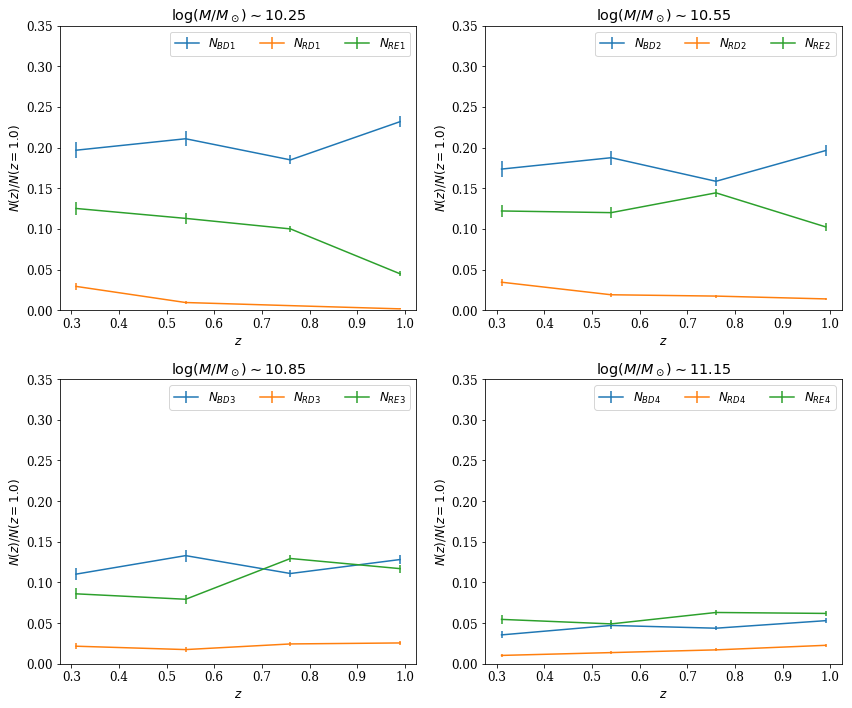

In [182]:
plot_N(Ndata, Nerr)

In [183]:
def plot_F(F, Ferr):
    fig, axarr = plt.subplots(1, 2, figsize=(12, 5))
    axarr = axarr.flat
    Fm = F.filter(regex=('.*R.D,[1234].*'))
    Ferrm = Ferr.filter(regex=('.*R.D,[1234].*'))
    for col in Fm:
        axarr[0].errorbar(Fm.index, Fm[col], Ferrm[col], label=col)
    axarr[0].set(xlabel='$z$', ylabel='$f_{R|D}(z)$',
              ylim=(0, 0.4))
    axarr[0].legend(loc=1, ncol=4)
    Fm = F.filter(regex=('.*D.R,[1234].*'))
    Ferrm = Ferr.filter(regex=('.*D.R,[1234].*'))
    for col in Fm:
        axarr[1].errorbar(Fm.index, Fm[col], Ferrm[col], label=col)
    axarr[1].set(xlabel='$z$', ylabel='$f_{D|R}(z)$',
              ylim=(0, 0.4))
    axarr[1].legend(loc=1, ncol=4)
    plt.tight_layout()

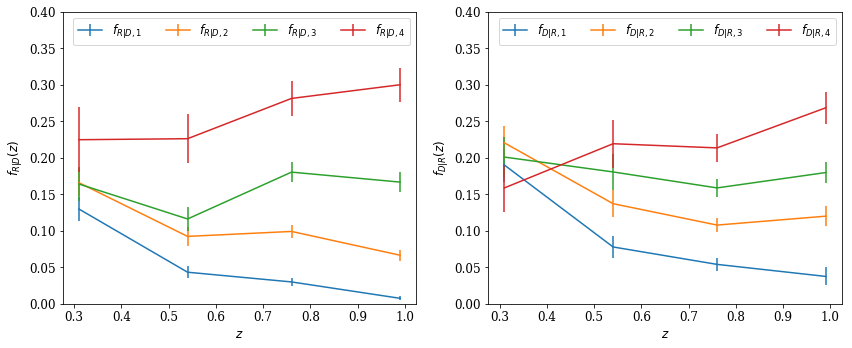

In [184]:
plot_F(Fdata, Ferr)